# Generating Mel-Spectrograms for all sound files in GTZAN dataset
[GTZAN Dataset](https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification)

In [1]:
! pip install kaggle

In [4]:
! mv ./kaggle.json /root/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

 99% 1.20G/1.21G [00:11<00:00, 122MB/s]
100% 1.21G/1.21G [00:11<00:00, 114MB/s]


In [6]:
! unzip -q /content/gtzan-dataset-music-genre-classification.zip

In [7]:
# code for generating spectrogram
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

class MSpGenerator:
    def __init__(self,frame_length=2048,hop_length=512,n_mels=90):
        self.frame_length = frame_length
        self.hop_length = hop_length
        # Number of mel frequency bands
        self.n_mels = n_mels

        # Information to crop image generated by plt
        # This is done because plt adds white space outside plot which
        # is useless in our case
        self.image_cropped = False
        self.top = 15
        self.bottom = 281
        self.left = 20
        self.right = 486

    def generate_mel(self,file_name):
        # name of soundfile
        file_base = file_name.split('/')[-1][:-4]
        # genre of soundfile
        file_category = file_name.split('/')[-2]

        original_signal, sr = librosa.load(file_name)

        for i in range(0,30,5):
            signal = original_signal[i*sr:(i+5)*sr]

            mel_spectrogram = librosa.feature.melspectrogram(signal,sr=sr,
                    n_fft=self.frame_length,hop_length=self.hop_length,
                    n_mels = self.n_mels)
            # apply logarithmic transformation to power as our perception of
            # loudness is not linear by logarithmic
            log_mel_spectrogram = librosa.power_to_db(mel_spectrogram,ref=np.max)

            # plotting the mel-spectrogram
            plt.rcParams['figure.dpi'] = 100 # pixel in inches
            plt.subplots(figsize=(4.5, 3))
            librosa.display.specshow(log_mel_spectrogram)
            plt.tight_layout()
            drive_path = '/content/drive/MyDrive/music_sp/'
            plt.savefig(drive_path+file_category+'/'+file_base+'_'+str(i//5)+'.png')

            # processing plot generated to revmove  white space
            im = Image.open(drive_path+file_category+'/'+file_base+'_'+str(i//5)+'.png')
            im = np.array(im)
            if self.image_cropped == False:
                self.crop_image(im)
            im_n = im[self.top:self.bottom,self.left:self.right]
            im_n = Image.fromarray(im_n)
            # Saving final image of mel-spectrogram
            im_n.save(drive_path+file_category+'/'+file_base+'_'+str(i//5)+'.png')

    def crop_image(self,im):
        h = im.shape[0]
        w = im.shape[1]

        # Get the first non-white pixel from top
        for i in range(0,h):
            if list(im[i][w//2])[:3]!= [255,255,255]:
                self.top = i+1
                print(f'self.top is {self.top}')
                break

        # Get the first non-white pixel from bottom
        for i in range(h-1,-1,-1):
            if list(im[i][w//2])[:3] != [255,255,255]:
                self.bottom = i
                print(f'self.bottom is {self.bottom}')
                break;

        # Get the first non-white pixel from left
        for i in range(0,w):
            if list(im[h//2][i])[:3] != [255,255,255]:
                self.left = i+1
                print(f'self.left is {self.left}')
                break;

        # Get the first non-white pixel from right
        for i in range(w-1,-1,-1):
            if list(im[h//2][i])[:3] != [255,255,255]:
                self.right = i
                print(f'self.right is {self.right}')
                break
        self.image_cropped = True

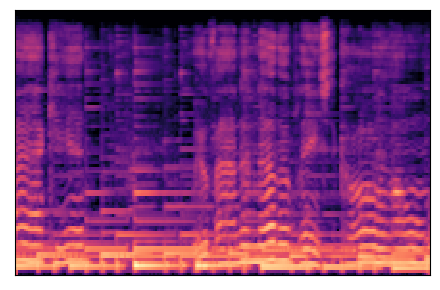

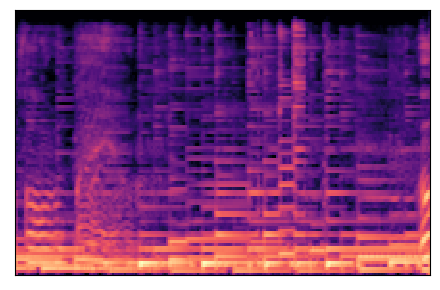

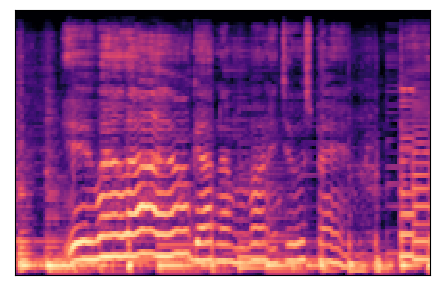

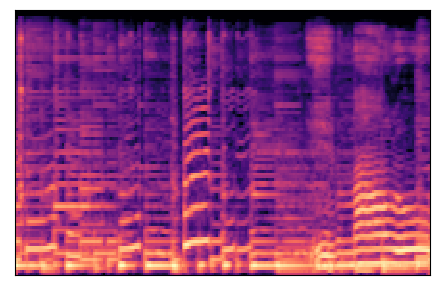

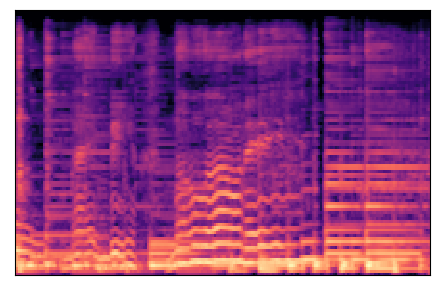

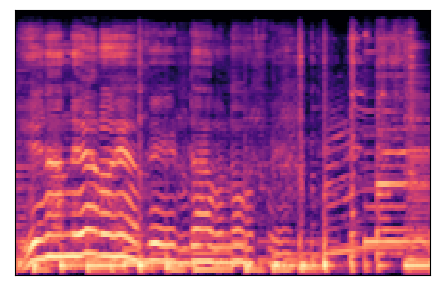

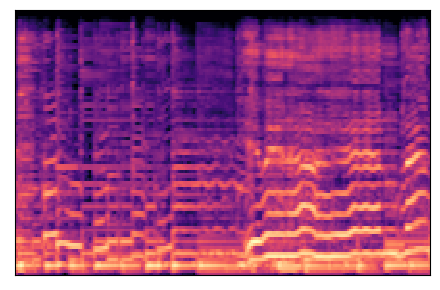

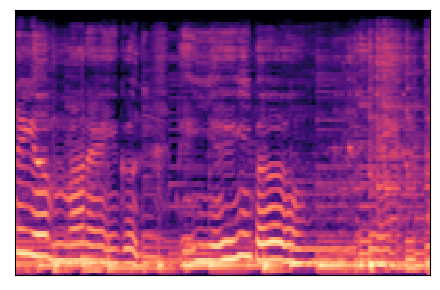

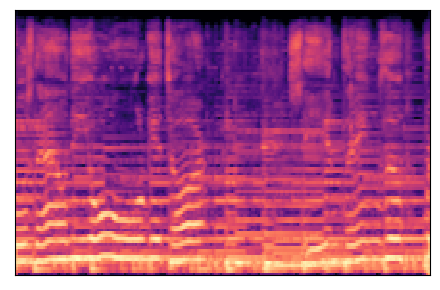

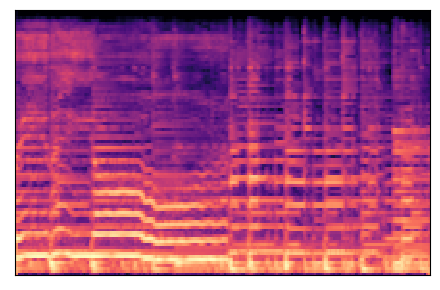

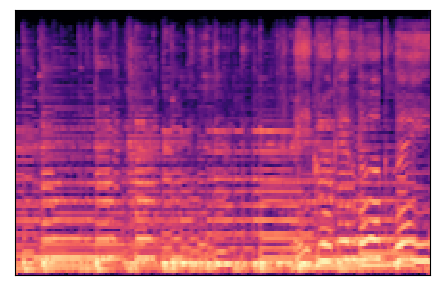

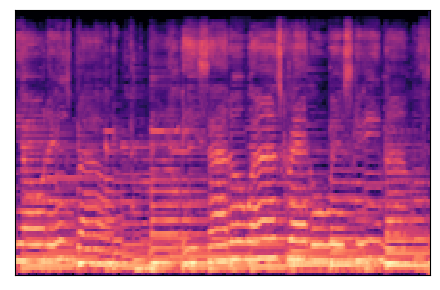

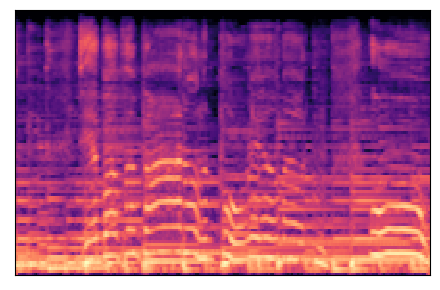

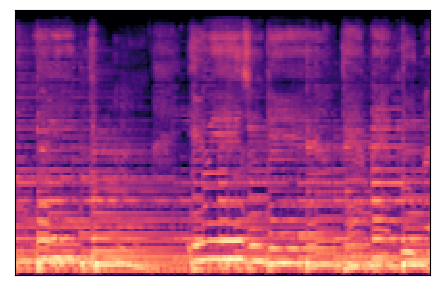

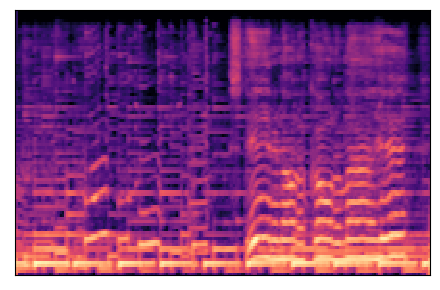

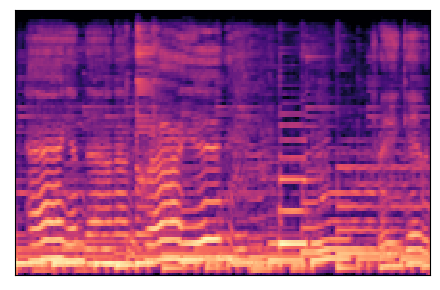

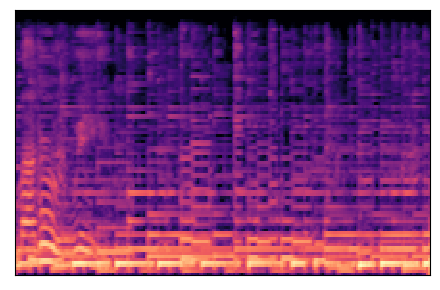

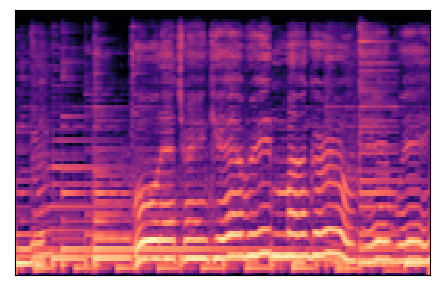

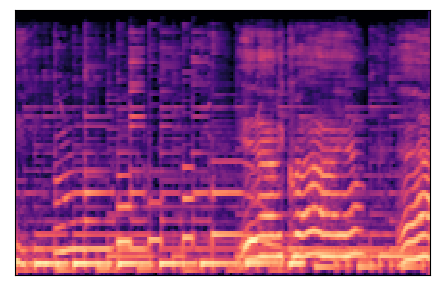

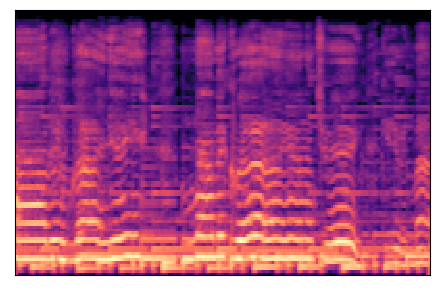

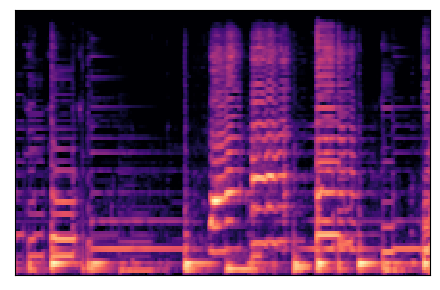

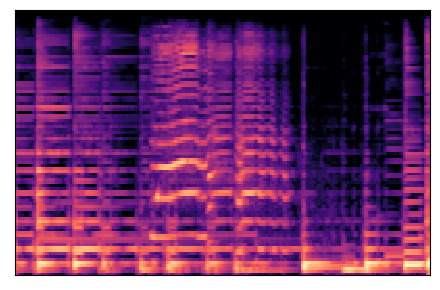

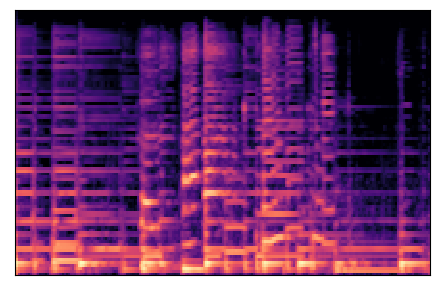

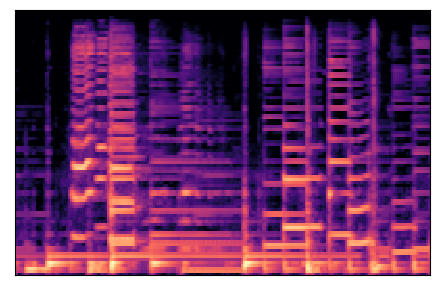

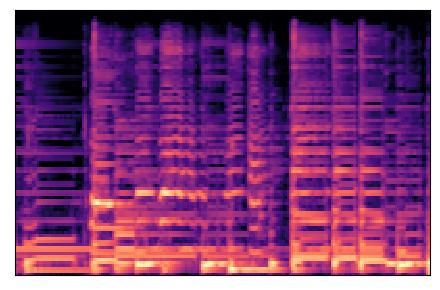

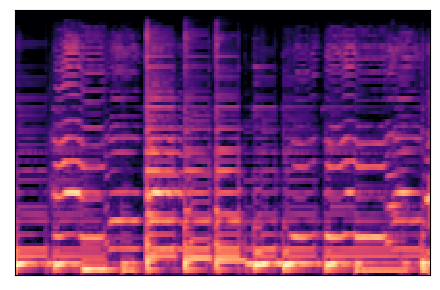

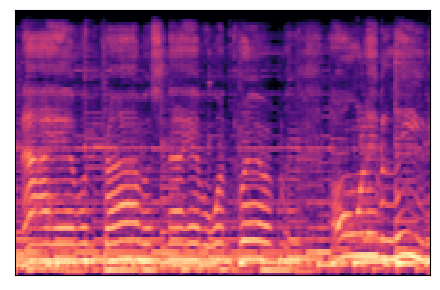

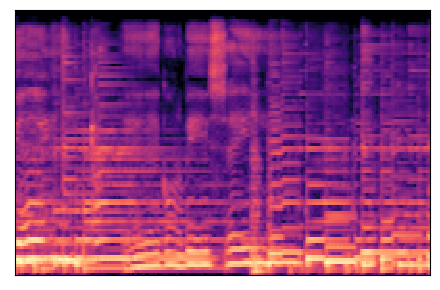

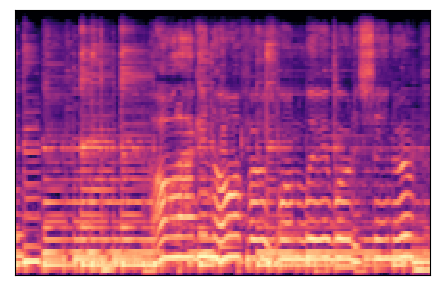

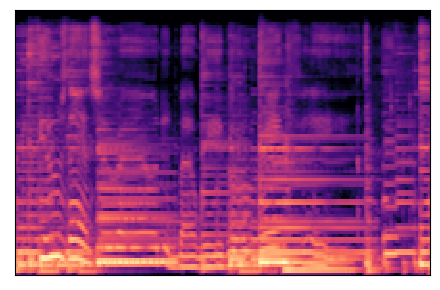

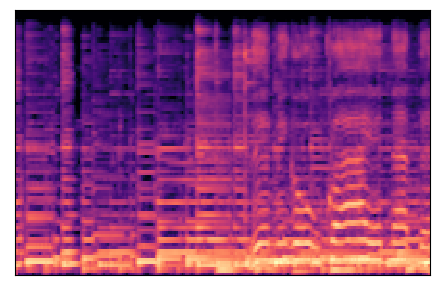

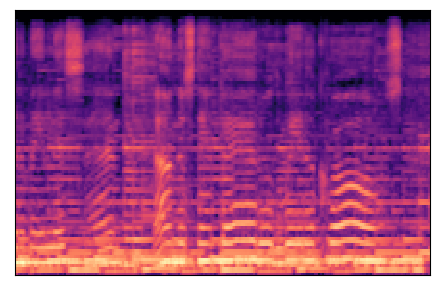

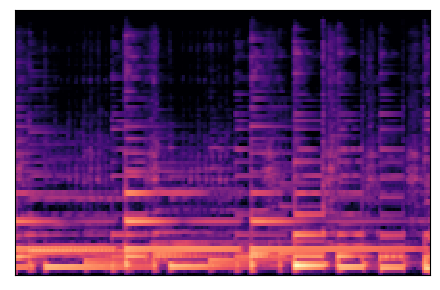

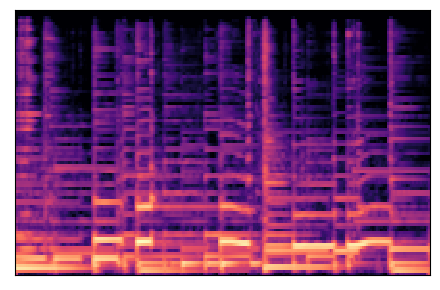

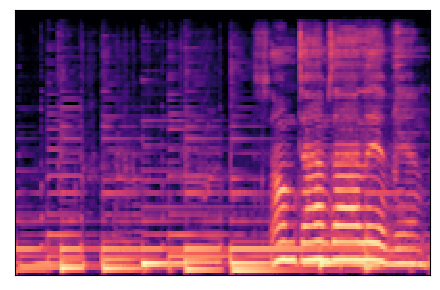

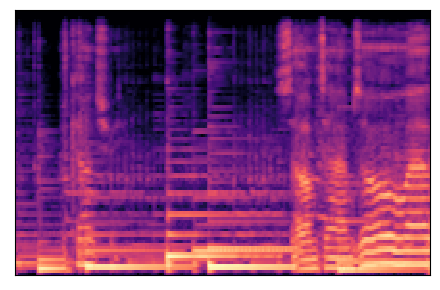

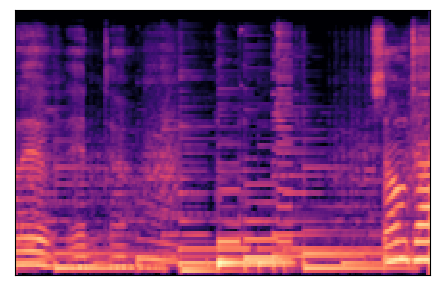

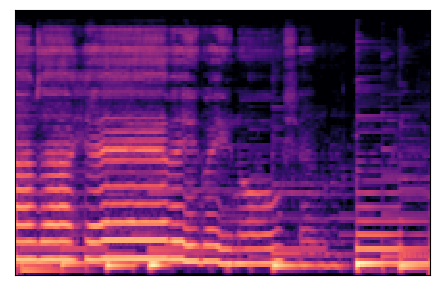

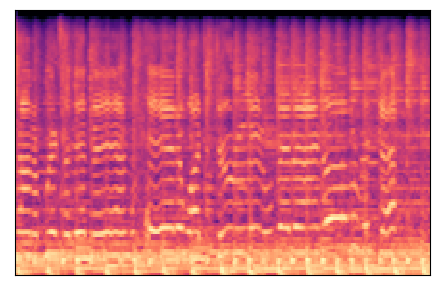

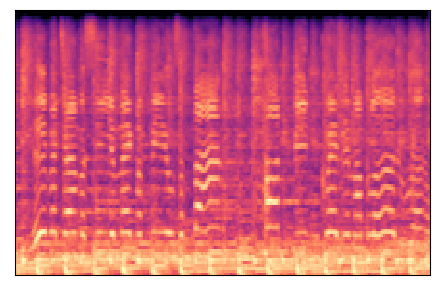

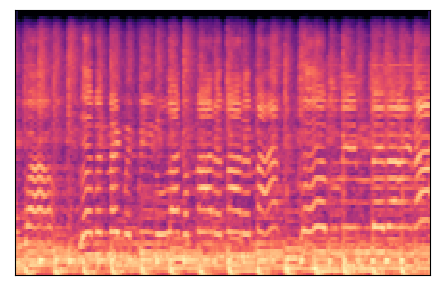

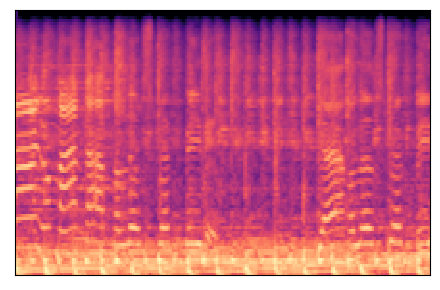

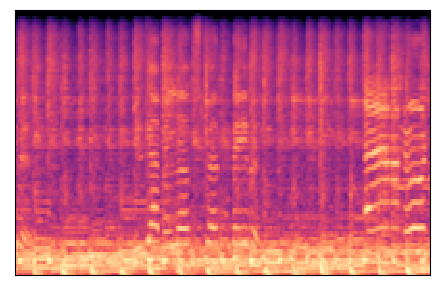

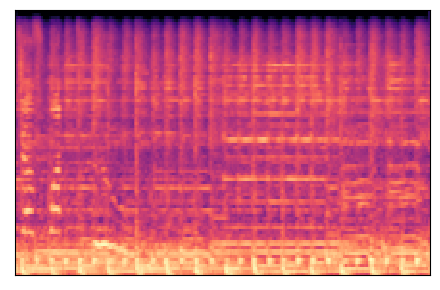

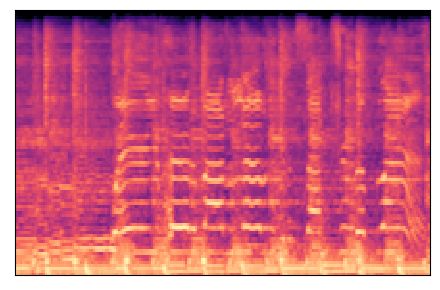

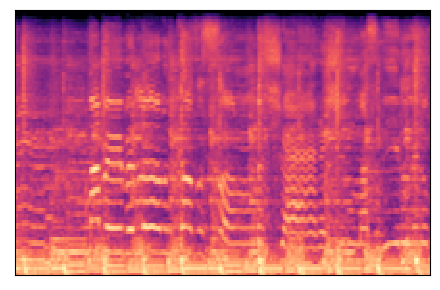

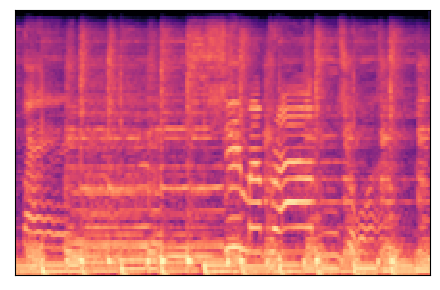

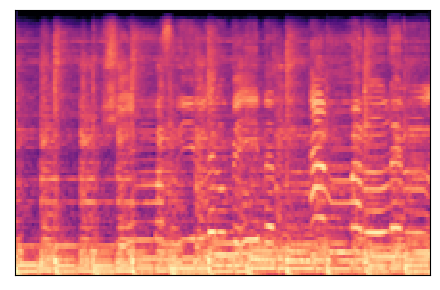

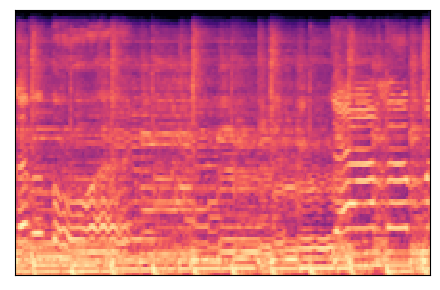

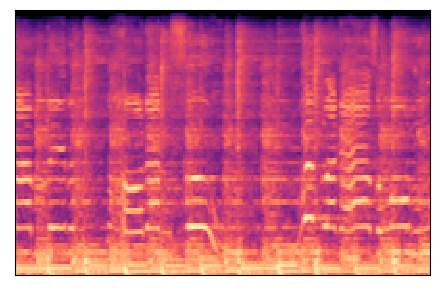

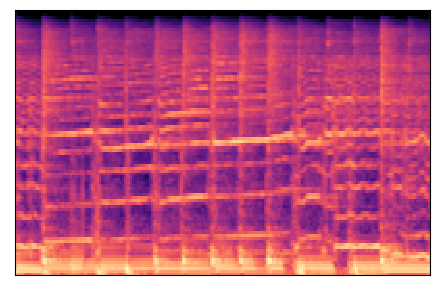

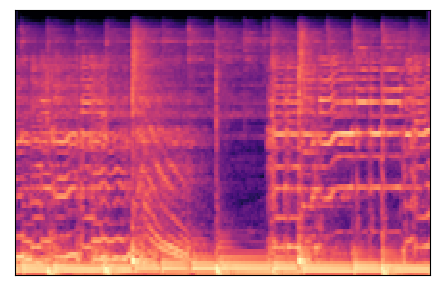

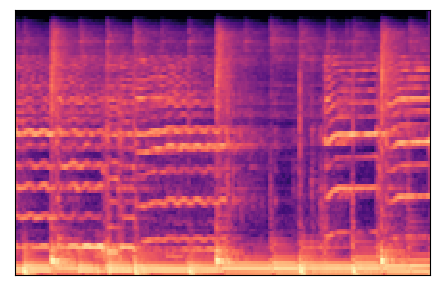

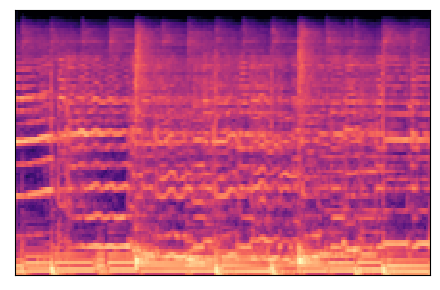

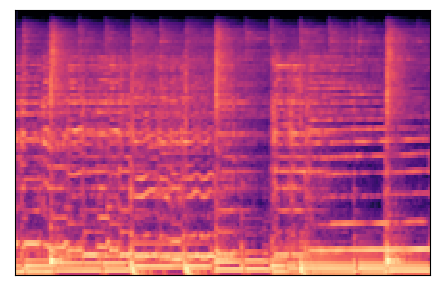

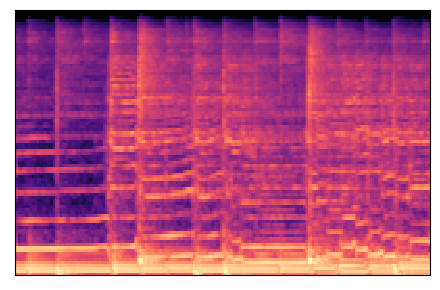

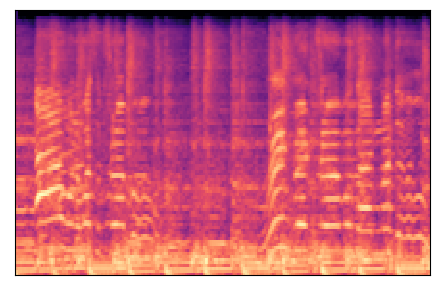

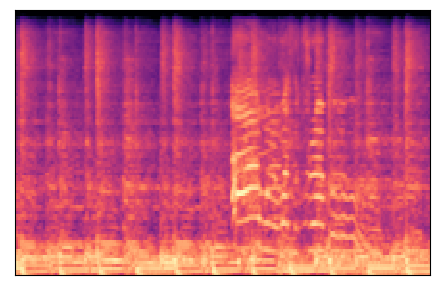

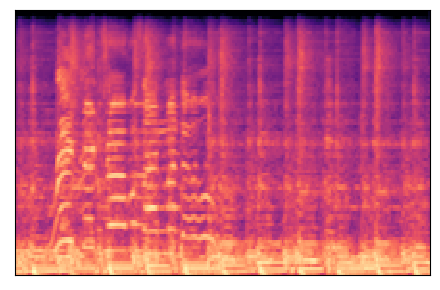

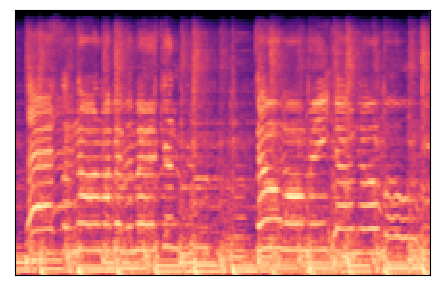

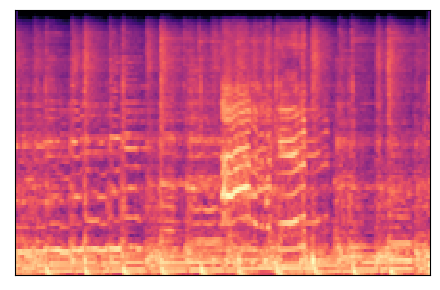

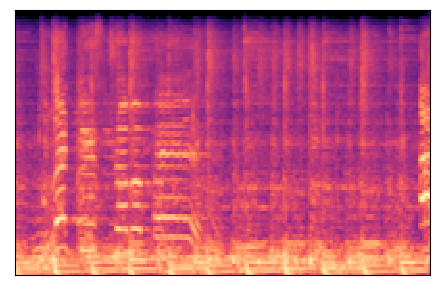

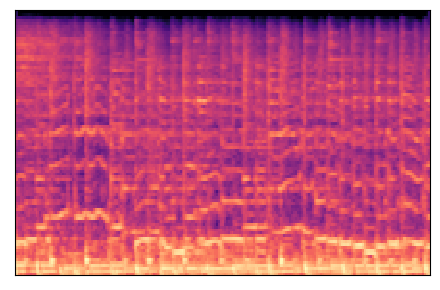

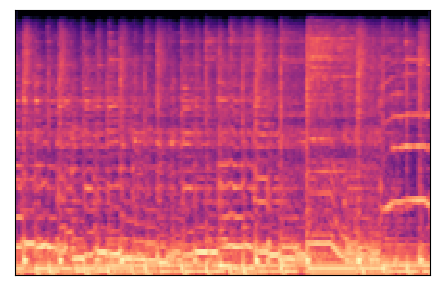

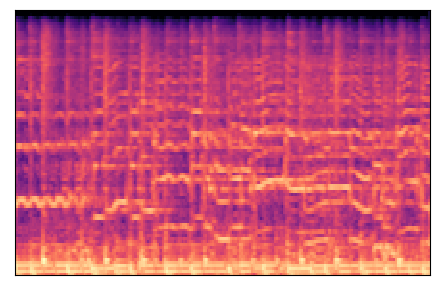

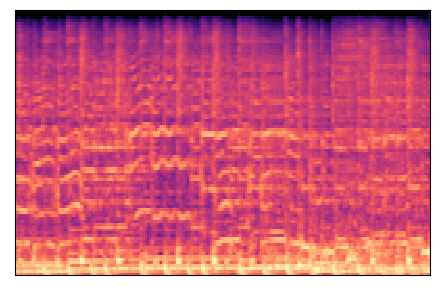

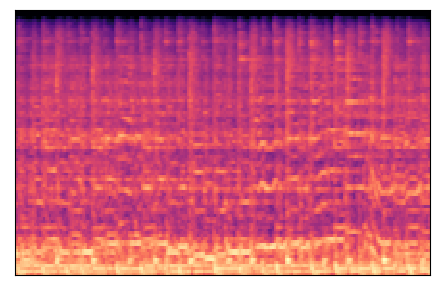

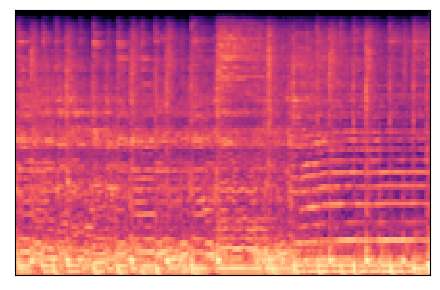

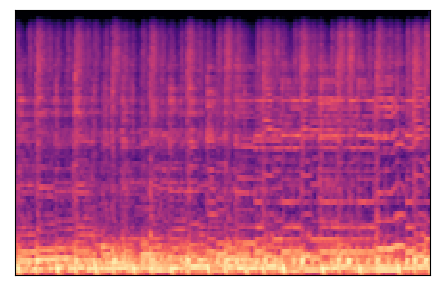

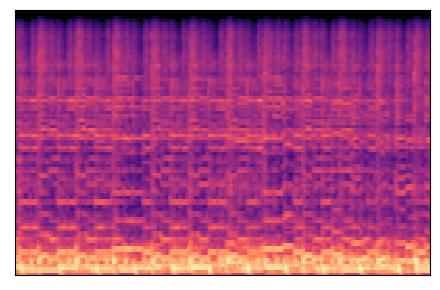

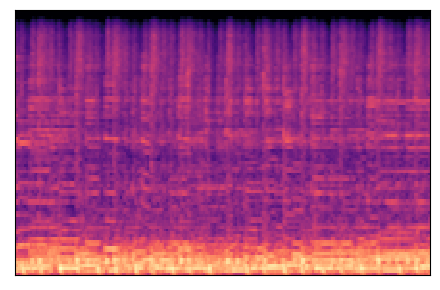

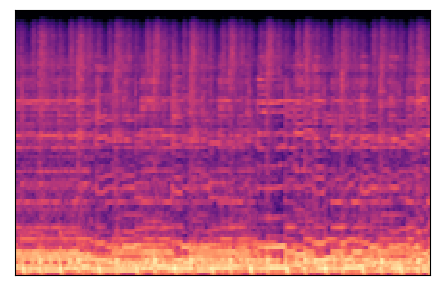

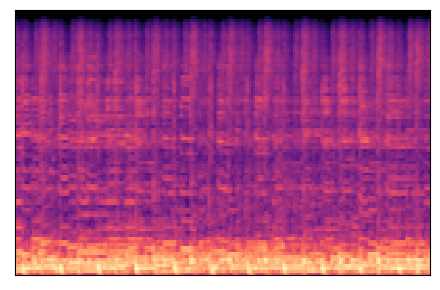

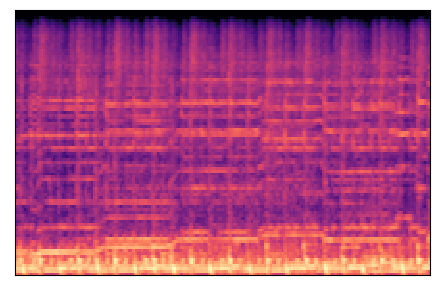

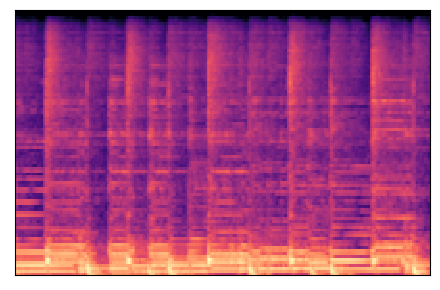

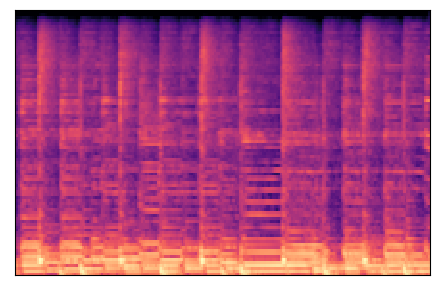

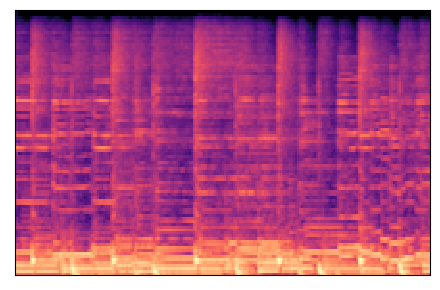

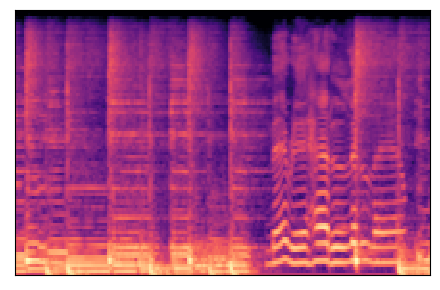

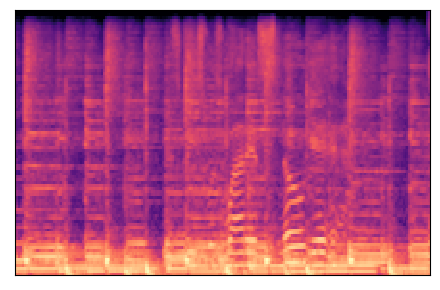

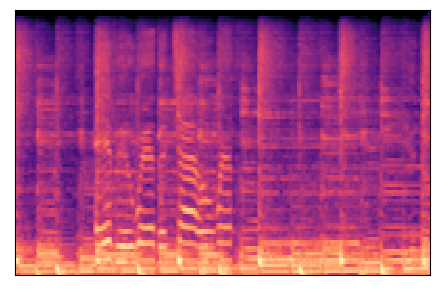

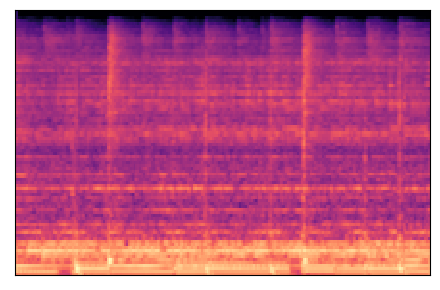

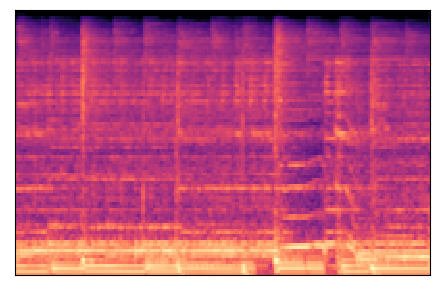

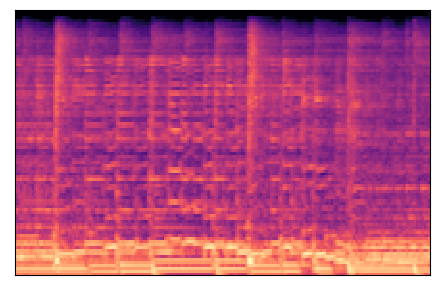

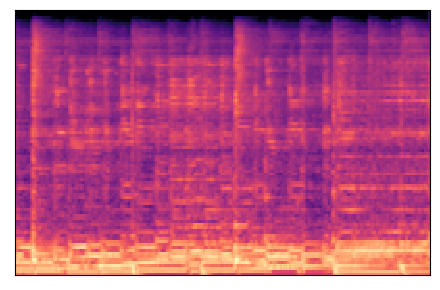

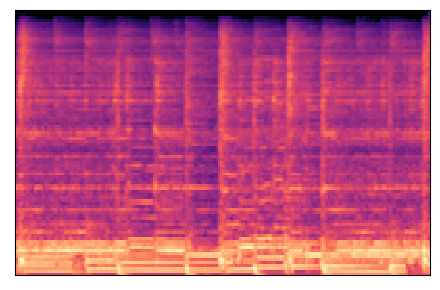

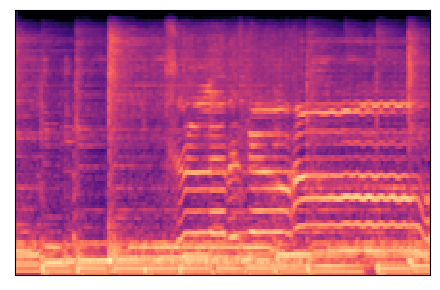

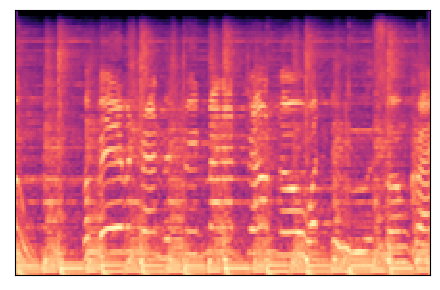

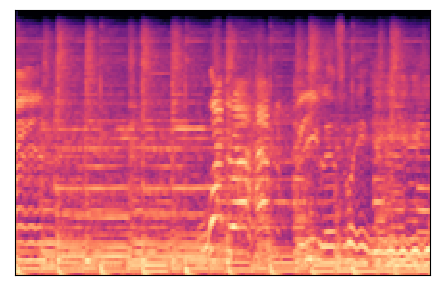

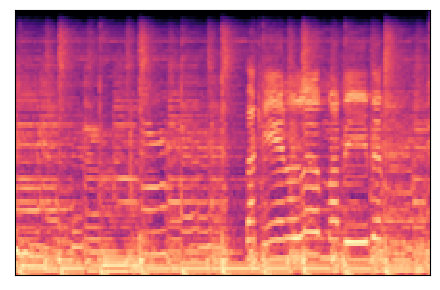

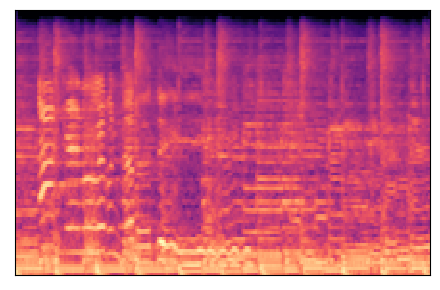

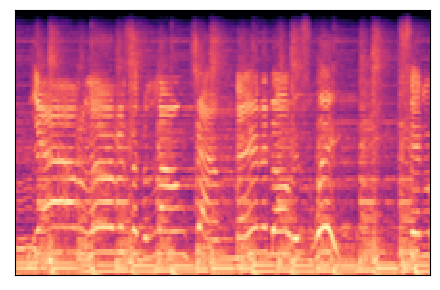

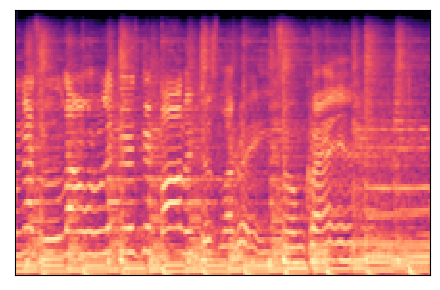

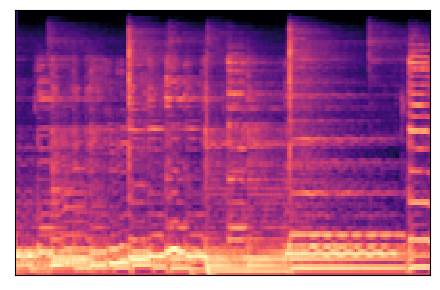

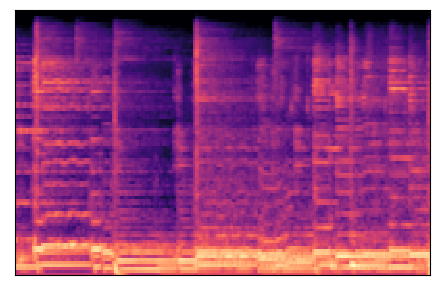

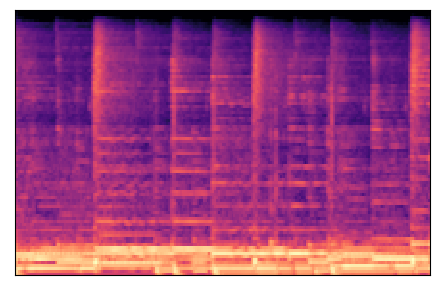

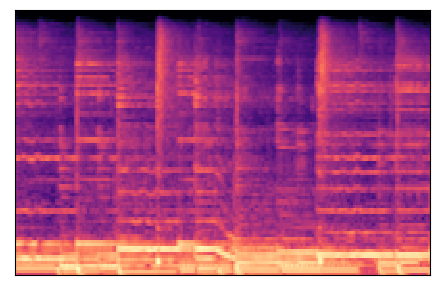

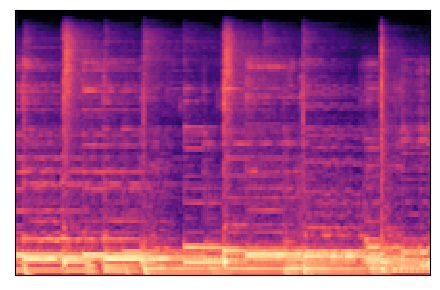

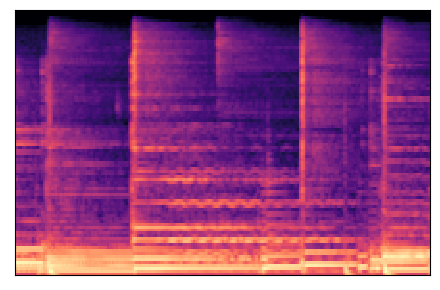

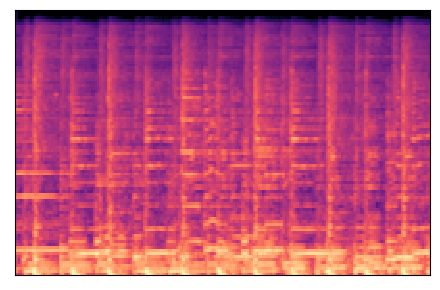

In [ ]:
# file_list contains all sound file paths
f = open('file_list.txt')
files = f.read()
files = files.splitlines()

msp_gen = MSpGenerator()

for file in files:
  msp_gen.generate_mel(file)